# Caso 2: Mezcla de Canales Digitales -- VIDEO EXPLICATIVO COURSERA: https://www.coursera.org/learn/optimizacion-para-toma-decisiones/lecture/EJsgQ/implementacion-del-caso

---
## Maestría en Inteligencia Analítica de Datos

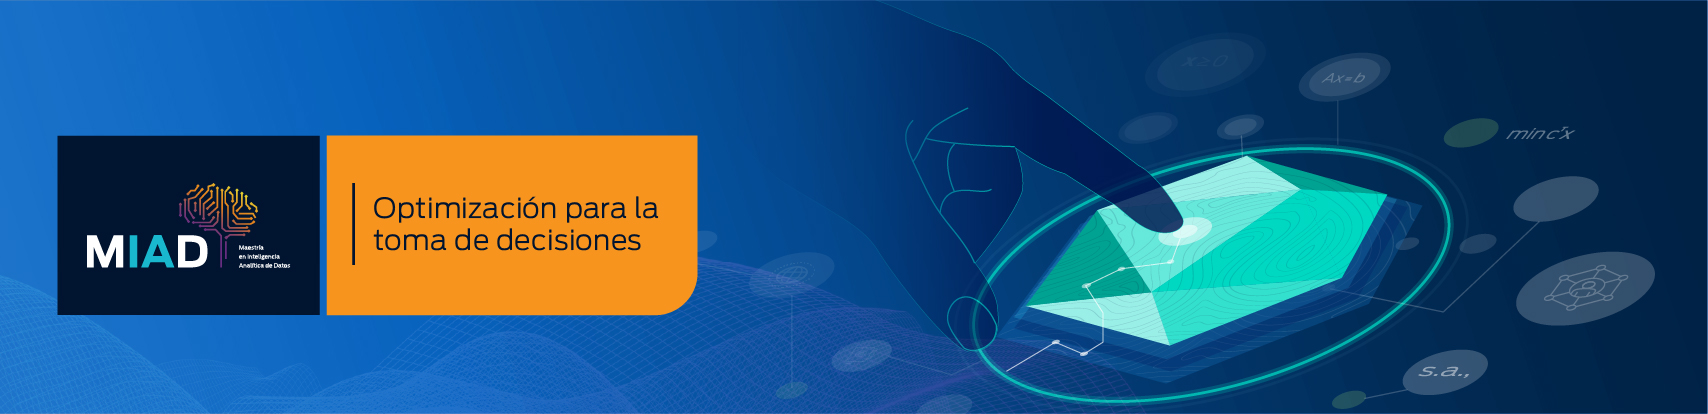


## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los demás laboratorios siguen una estrucutra similar). 

Este laboratorio tiene las siguientes secciones: 
* **Formulación**: un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelado**: aquí implementamos el modelo visto en la formulación (aquí encontrarás por lo general celdas de código que debes completar, ¡nosotros te guiaremos en el proceso!)
* **Reporte de Resultados**: esta sección nos muestra las soluciones encontradas por el modelo y, en ocasiones, algunas visualizaciones interesantes para entenderlo mejor. (es posible que en ciertas prácticas debas completar algunas celdas también)

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# your code here`. Antes de estas celdas encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde. Ten en cuenta que si no sigues las instrucciones al pie de la letra, no obtendrás el puntaje. Por ejemplo, **debes llamar a las variables en Python y nombrar los elementos de tu modelo exactamente cómo lo indica el enunciado. De lo contrario, no obtendrás puntaje en ese inciso.** 

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y Parámetros
>#### **Conjuntos**
>* $I$: conjunto de canales de mercadeo

>#### **Parámetros**
>* $a_i:$ incremento en ventas por cada dólar invertido en el canal $i \in I$
>* $c_i:$ presupuesto máximo para invertir en el canal $i\in I$
>* $p:$ presupuesto total para la campaña
>* $q:$ mínimo porcentaje de inversión en el canal Facebook

### Variables de Decisión
> $x_i:$ dinero a ser invertido (en USD) en el canal $i\in I$


### Restricciones
> 1. Cada canal $i\in I$ tiene un máximo posible de inversión estipulado $c_i$
>> $x_i \leq c_i, \; \forall i\in I$

> 2. El presupuesto global para la campaña es de $p$
>> $\sum_{i\in I} x_i \leq p$

> 3. La inversión en las publicaciones promocionadas de Facebook debe seguir siendo superior a $q=0.3$ del total de inversión
>> $q\cdot\sum_{i\in I}x_i \leq x_{\text{Facebook}}$

> **Naturaleza de Variables**
>>$x_i\geq 0 , \; \forall i\in I$

### Función Objetivo
> Maximizar el incremento en ventas dado por la inversión en canales de mercadeo
>> $\max{ \sum_{i\in I} a_ix_i}$

## Importación de librerías
---
En este curso usaremos el paquete/librería `pulp` en su versión 2.6.0. Este paquete proporciona un modelador de problemas lineales de optimización para Python. Su API permite crear variables, añadir restricciones y llamar optimizadores (gratuitos y pagos para resolver problemas). A través de este paquete se generan los archivos `LP`que son usados por los *optimizadores* para ejecutar los algoritmos de optimización. `pulp` utiliza por defecto el optimizador CBC que es mantenido por la comunidad de [COIN-OR](https://www.coin-or.org) y es de fuente libre. También puede ser usado con optimizadores pagos como Gurobi o CPLEX. Su alias para este curso el `lp`. Si deseas conocer más, puedes visitar:
>**GitHub**: https://github.com/coin-or/pulp

>**Documentación**: https://coin-or.github.io/pulp/

La forma más fácil de instalar `pulp` es a través de PyPi ejecutando el comando de `pip`: ` python -m pip install pulp` en la consola. También está disponible en conda y [conda-forge](https://anaconda.org/conda-forge/pulp)

Con el paquete `pulp` introduciremos métodos para crear diccionarios de variables (basados en conjuntos) y una forma fácil de formular expresiones que usan conjuntos en las sumas.

> **Recuerda** que el alias de `pulp` es `lp` y que como estándar el nombre del objeto que guardará el problema de optimización se llamará `problema`.

In [71]:
import pulp as lp

## Creación de Parámetros
---

Para este caso nuestro único conjunto son los canales de mercadeo que escogeremos. Haremos una lista de Python donde guardaremos el nombre de cada canal. 

### Conjuntos
$I$: Conjunto de canales de mercadeo

In [72]:
I = ["Facebook", "YouTube", "Twitter", "TikTok", "LinkedIn"]

### Parámetros
* $a_i:$ Incremento en ventas por cada dólar invertido en el canal $i \in I$
* $c_i:$ Presupuesto máximo para invertir en el canal $i\in I$
* $p:$ Presupuesto total para la campaña
* $q:$ Mínimo porcentaje de inversión en el canal Facebook


Para crear los parámetros construiremos diccionarios cuyas **llaves** correspondan los índices del conjunto y como **valores** el valor del parámetro correspondiente. 

In [73]:
# Incremento en ventas por dolar invertido en cada canal
a = {
    "Facebook": 2,
    "YouTube": 5,
    "Twitter": 3,
    "TikTok": 4.5,
    "LinkedIn": 2.9,
}

# Presupuesto máximo para invertir en cada canal
c = {
    "Facebook": 3000,
    "YouTube": 4000,
    "Twitter": 2000,
    "TikTok": 2000,
    "LinkedIn": 3000,
}

# Presupuesto total para la campaña
p = 10000

# Mínimo porcentaje de inversión en el canal 'Facebook' (30%)
q = 0.3


**Celda de Prueba (0 puntos)**

Recomendación: Una buena práctica es explorar los datos de entrada del problema antes de empezar a implementarlo y resolverlo. Por ejemplo, uno podría entender el contexto de los datos al graficarlos o explorando las tablas o estructuras en las que vienen. 
* **Esta celda no es calificable**

Lista de canale disponibles para publicidad
Facebook
YouTube
Twitter
TikTok
LinkedIn

Incremento en ventas por dolar invertido en cada canal


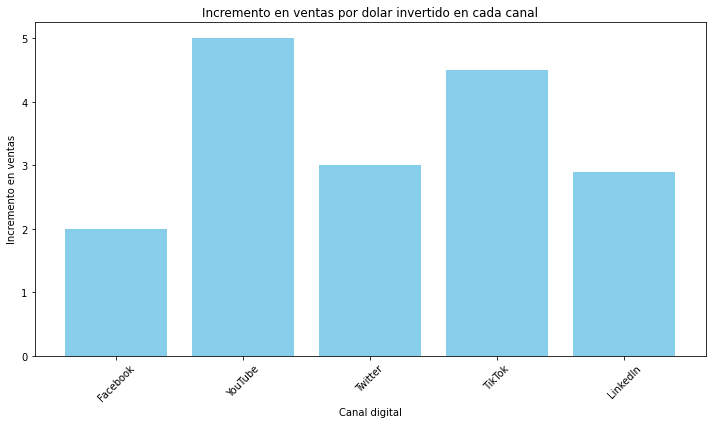


Presupuesto máximo para invertir en cada canal


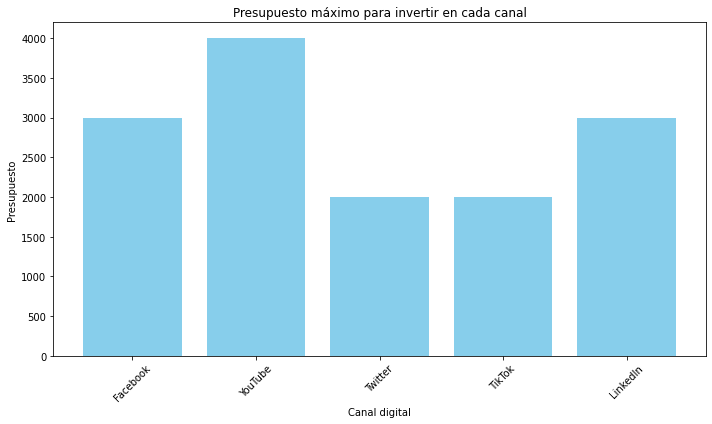

In [74]:
### Aquí puedes explorar los parámetros

#Validacion de elementos en la lista I que contiene los canales digitales
print("Lista de canale disponibles para publicidad")
for i in I:
    print(i)

#Validacion de incremento en ventas por dolar invertido en cada canal
print("\nIncremento en ventas por dolar invertido en cada canal")
import matplotlib.pyplot as plt
etiquetas = list(a.keys())
valores = list(a.values())
plt.figure(figsize=(10, 6))
plt.bar(etiquetas, valores, color='skyblue')
plt.title('Incremento en ventas por dolar invertido en cada canal')
plt.xlabel('Canal digital')
plt.ylabel('Incremento en ventas')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Validacion presupuesto máximo para invertir en cada canal
print("\nPresupuesto máximo para invertir en cada canal")
import matplotlib.pyplot as plt
etiquetas = list(c.keys())
valores = list(c.values())
plt.figure(figsize=(10, 6))
plt.bar(etiquetas, valores, color='skyblue')
plt.title('Presupuesto máximo para invertir en cada canal')
plt.xlabel('Canal digital')
plt.ylabel('Presupuesto')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modelamiento
---

### Declaración del modelo
El primer paso para desarrollar un problema de optimización en `pulp` es declarar el objeto `lp.LpProblem` en el cual podemos agregar variables, restricciones y la función objetivo. Como convención para todos los trabajos y entregas de este curso, este objeto se llamará `problema`. Este objeto nos permite añadir los componentes del problema de optimización.

El método `lp.LpProblem()` crea un problema lineal de optimización.

**Pregunta 1 (10 puntos)**
* Crea un objeto modelo en PuLP (`lp.LpProblem`) llamado `problema`
* Indica el sentido de la optimización: maximizar o minimizar


> **Recuerda** que el sentido se indica con el argumento `sense` en `lp.LpProblem()`, que toma valores `lp.LpMaximize` o `lp.LpMinimize`

In [75]:
# your code here
problema = lp.LpProblem(sense=lp.LpMaximize)

In [76]:
# Esta celda esta reservada para uso del equipo docente


In [77]:
# Esta celda esta reservada para uso del equipo docente


## Variables de decisión
* $x_i:$ dinero a ser invertido (en USD) en el canal de mercadeo $i\in I$

**Pregunta 2 (20 puntos)**

* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`.
* Especifica el nombre de las variables como `inversion` con el argumento `name`.
* Especifica el conjunto sobre el cual está indexado la variable con el argumento `indexs`. 
* Especifica el límite inferior en 0 con el argumento `lowBound`.
* Especifica el tipo de variable con el argumento `cat` (continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`).


> **Para crear un grupo de variables** usa el método `lp.LpVariable.dicts(name, indexs, lowBound, upBound, cat)`

Por ejemplo:
```python
x = lp.LpVariable.dicts(name='inversion', indexs=I, lowBound=0, upBound=None, cat=lp.LpContinuous)
 
```

> Donde:
> - `name`: el nombre de la variable
> - `indexs`: lista de las llaves que tendrá el diccionario de variables. Normalmente corresponde a los conjuntos
> - `lowBound`: el límite inferior de la variable. Por defecto es `None`, esto es, el infinito negativo
> - `upBound` : el límite superior de la variable. Por defecto es `None`, esto es, el infinito positivo
> - `cat`: el tipo de variable: continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`


In [78]:
# your code here
x = lp.LpVariable.dicts(name='inversion', indexs=I, lowBound=0, upBound=None, cat=lp.LpContinuous)

In [79]:
# Esta celda esta reservada para uso del equipo docente


In [80]:
# Esta celda esta reservada para uso del equipo docente


### Función Objetivo
> Maximizar el incremento en ventas dado por la inversión en canales de mercadeo
>> $\max{ \sum_{i\in I} a_ix_i}$


**Pregunta 3 (20 puntos)**
* Crea la función objetivo y agregala al modelo `problema`. A continuación, te explicamos como se usan las sumatorias en `pulp`

> **Recuerda** que para agregar una función objetivo o restricción a un modelo en pulp se usa la sintaxis: `<modelo> += <expresion>`

> **Recuerda** que una función objetivo en `pulp` consiste en multiplicar variables de tipo `lp.pulp.Variable` (como `x`) por constantes así: `<int|float> * <variable>` y luego sumarlas o restarlas así: `<const1> * <var1> + <const2> * <var2>`

> **Recuerda** que, para evitar escribir una sumatoria de muchos términos uno a uno, `pulp` permite crear sumatorias que recorran conjuntos siempre y cuando las variables esten indexadas (como `x`). Para esto, utiliza `lp.lpSum(<expresion> for <indices> in <conjunto>)`.

> **Ejemplo**:
>> $ \sum_{i \in I}n_i x_i$
es equivalente a `lp.lpSum(n[i]*x[i] for i in I)`

In [81]:
# your code here
problema += lp.lpSum([a[i]*x[i] for i in I]), "FuncionObjetivo"

In [82]:
# Esta celda esta reservada para uso del equipo docente

In [83]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones

> **Recuerda** que para crear restricciones se debe usar la sintaxis: `<modelo> += <expresion_lado_izq> ==|>=|<= <expresion_lado_der>, 'Nombre_de_la_restriccion'`

> **Recuerda** que las expresiones son combinaciones lineales de las variables, como: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que puedes usar `lp.lpSum()` para crear sumatorias (ver **Pregunta 3**)

> **Recuerda** que para crear múltiples restricciones usando $\forall i \in I$, se debe utilizar la sintaxis:
>>    * `for i in I:` 
>>       * `<restriccion>`

> **Ejemplo**
>> La siguiente restricción: $\sum_{i \in I} a_{ij} x_{ij} \geq 1, \; \forall j \in J$ es equivalente a:
>> ```python
for j in J:
    <modelo> += lp.lpSum(a[i,j] * x[i,j] for i in I) >= 1, 'R1_'+str(j)
```
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegúrate de volver a crear el modelo `problema` desde el principio (nosotros haremos esto antes de calificar, no te preocupes).
    
**Advertencia**: debes nombrar las restricciones cómo indican las instrucciones. De lo contrario, no recibirás puntaje. 

**Pregunta 4 (15 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 1. Cada canal $i\in I$ tiene un máximo posible de inversión estipulado $c_i$
>> $x_i \leq c_i ,\; \forall i\in I$

In [84]:
# your code here
for i in I:
    problema += x[i] <= c[i] , 'R1_'+str(i)

In [85]:
# Esta celda esta reservada para uso del equipo docente


**Pregunta 5 (15 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R2'` y añádela al modelo:

> 2. El presupuesto global para la campaña es de $p$
>> $\sum_{i\in I} x_i \leq p$

In [86]:
# your code here
problema += lp.lpSum([x[i] for i in I]) <= p , 'R2'

In [87]:
# Esta celda esta reservada para uso del equipo docente


**Pregunta 6 (15 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R3'` y añadela al modelo:

> 3. La inversión en las publicaciones promocionadas de Facebook debe seguir siendo superior a $q=0.3$ del total de inversión.
>> $q\cdot\sum_{i\in I}x_i \leq x_{\text{Facebook}}$

In [88]:
# your code here
problema += q*lp.lpSum(x) <= x["Facebook"] , 'R3'

In [89]:
# Esta celda esta reservada para uso del equipo docente


In [90]:
# Esta celda esta reservada para uso del equipo docente

### Invocar al optimizador

Ahora que el modelo está listo, viene la mejor parte: ¡Correr el modelo! La celda a continuación se encarga de llamar al optimizador de `pulp` y guardar las soluciones del modelo (si llega a optimalidad). Más adelante extraeremos la solución y otras métricas de interés del objeto `problema` y del diccionario de variables `x`.

> **Recuerda** debes utilizar la instrucción `<modelo>.solve()` para invocar al optimizador y resolver el problema. 


In [93]:
## Aquí puedes invocar al optimizador 
problema.solve()

1

## Reporte de resultados
---

**Estado del optimizador, función objetivo y otros indicadores**

A continuación puede evaluar la función objetivo óptima además del estado del optimizador.
> **Recuerda** que al finalizar de correr el modelo, `<modelo>.status` tomará un valor de 1, -1, -2 o -3, que hace referencia a algún estado del optmizador:
*  0 $\rightarrow$ Sin Resolver: No se ha usado `<modelo>.solve()`
*  1 $\rightarrow$ Óptimo
* -1 $\rightarrow$ Infactible
* -2 $\rightarrow$ No acotado 
* -3 $\rightarrow$ Otros

> **Recuerda** que `lp.LpStatus` es un diccionario en PuLP que tiene como llaves los `status` del optimizador (número) en `<modelo>.status`, y para cada `status` contiene el estado del optimizador en palabras.

> **Recuerda** que puedes inspeccionar el contenido de `lp.LpStatus`, simplemente corriendolo en una celda

> **Recuerda** que `<modelo>.objective` contiene la **expresión** de la función objetivo, sin embargo, para conocer el valor de la función objetivo se debe reemplazar los valores de las variables en la solución dentro de esta expresión. Por fortuna, PuLP tiene una función que hace justo eso: `lp.value(<expresion>)`.

In [103]:
## Aquí puedes revisar el estado del optimizador, función objetivo y otros indicadores
problema.status
print("Ventas por: " + str(lp.value(problema.objective)))

for i in I:
    print(i, x[i].value())
    

Ventas por: 38000.0
Facebook 3000.0
YouTube 4000.0
Twitter 1000.0
TikTok 2000.0
LinkedIn 0.0


**Pregunta 7 (5 puntos)**

Crea un diccionario llamado `resultados`.
Coloca como **llaves** los diferentes canales en el conjunto $I$.
Coloca como **valores** la cantidad de dinero a invertir en cada canal.

Por ejemplo, el primer registro del diccionario se ve así: `"Facebook": 3000.0`

>**Recuerda** que las variables `LpVariable` se almacenaron en un diccionario llamado `x` el cual tiene como llave el índice (del conjunto $I$) de la variable y como valor el objeto tipo `LpVariable`. 

>**Recuerda** que para obtener el valor actual de un objeto tipo `LpVariable` puede usar la función `lp.value`.

In [105]:
# your code here
resultados = {}
for i in I:
    resultados[i] = x[i].value()

In [ ]:
# Esta celda esta reservada para uso del equipo docente


### Fin del laboratorio
---
Cuando hayas finalizado las preguntas, debes presionar el botón "Enviar tarea" en la parte superior.

Después de enviar el laboratorio, debes esperar algunos minutos para que se cargue la nota en Coursera.
¡Muchos éxitos!

**Sugerencia**: tómate un tiempo para revisar que tu implementación es correcta y sigue al pie de la letra las instrucciones. Así evitaras perder puntaje. 